# United State Census

 The data here is for the "Census Income" dataset, which contains data on adults from the 1994 census. This data is labeled with whether the person's yearly income is above or below $50K

## Prerequisites:
Python

scikit-learn / sklearn

Pandas

NumPy

matplotlib

## Objectives in this project:

Perform data cleaning on the dataset

Make a EDA report

Visualize the distributions of various features and correlations between them

Feature engineering to extract the correct features for the model

Build a classification model based on the features that you select to predict if the income is above $50k or not.

## Dataset:
    https://docs.google.com/document/d/19qZpBJT4MSIZz3A_B1zz7uSRpVZbVkZCRkqJ9Vxm2Zc/edit

##                                                          Importing libraries for the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##                                                                 Storing  the census data in df

In [3]:
df=pd.read_csv('census - census.csv')

## Showing first Ten row from stored data in df

In [5]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Now removing unwanted data from the stored data in df

In [6]:
df=df[df['native.country']!='?']


In [7]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Imorting labelEncoder from sklearn library

In [8]:
from sklearn.preprocessing import LabelEncoder


## Making object of labelEncoder class

In [9]:
la=LabelEncoder()

In [10]:
df.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

## Ploting graph of workclass from df(data) using seaborn library

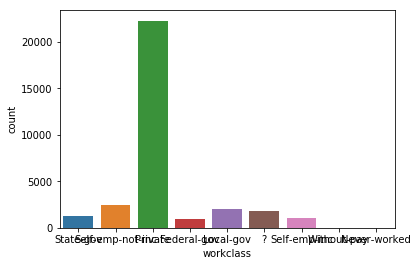

In [11]:
sns.countplot('workclass',data=df)


## Ploting graph of sex from df(data) using seaborn library

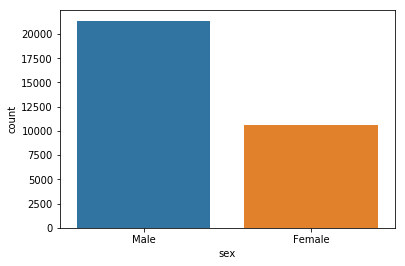

In [12]:
sns.countplot('sex',data=df)

## Ploting graph of race from df(data) using seaborn library

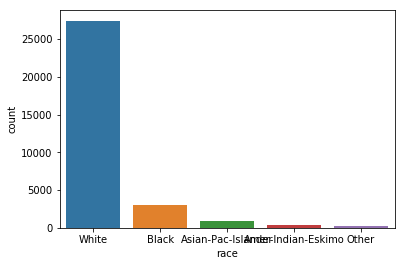

In [13]:
sns.countplot('race',data=df)

## Ploting graph of marital status from df(data) using seaborn library

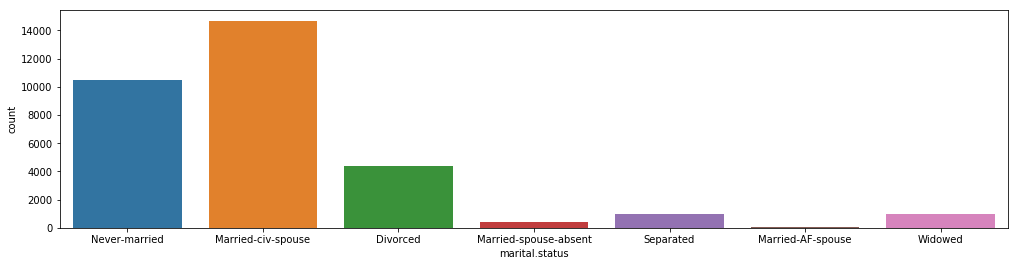

In [14]:
plt.figure(0,figsize=(17,4))
sns.countplot('marital.status',data=df)

## Ploting graph of occupation from df(data) using seaborn library

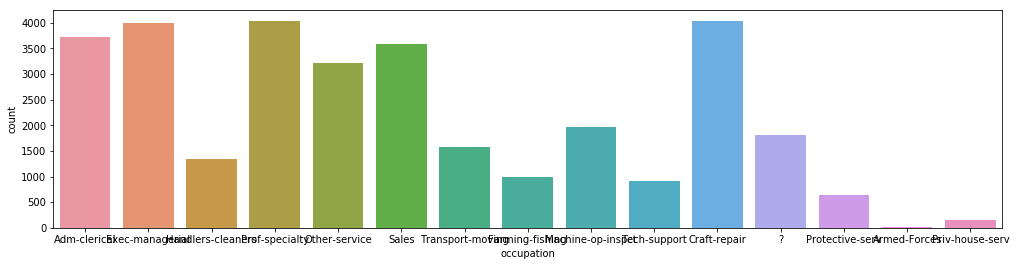

In [15]:
plt.figure(0,figsize=(17,4))
sns.countplot('occupation',data=df)

## Ploting scatter plot of all the columns with repect to each other

c:\users\viney gautam\appdata\local\programs\python\python36\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


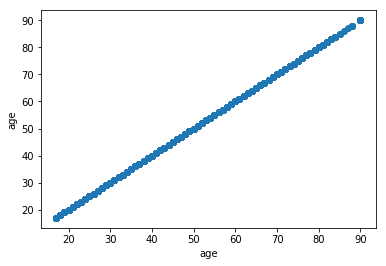

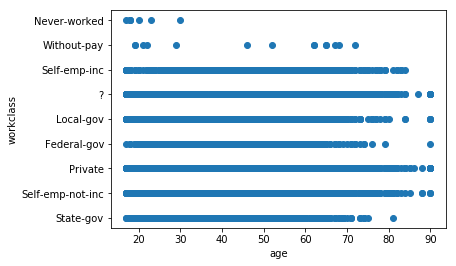

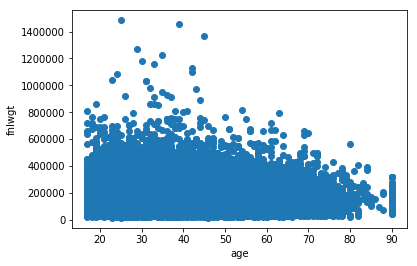

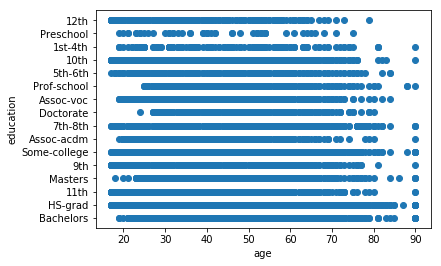

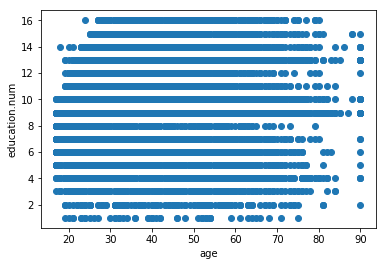

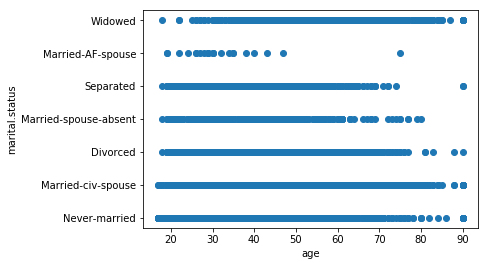

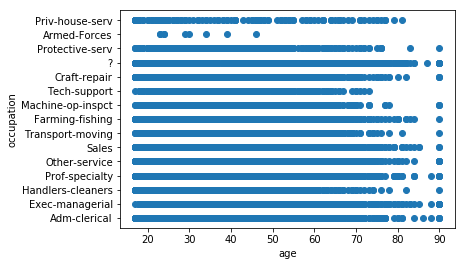

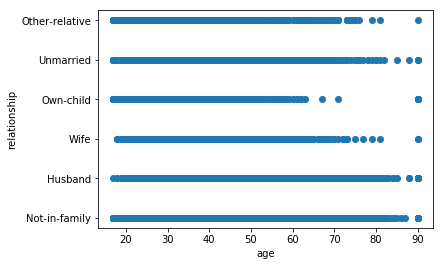

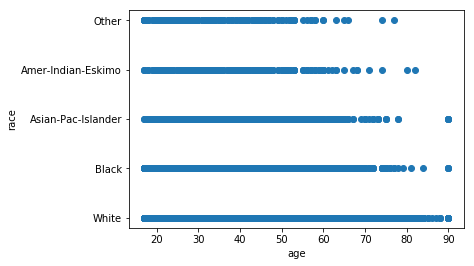

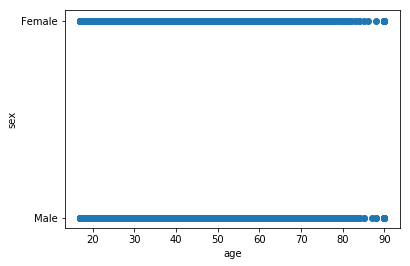

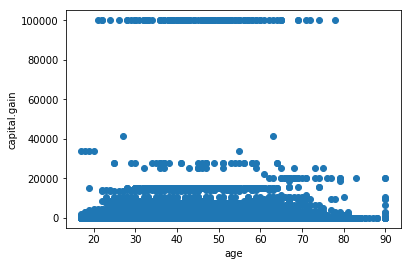

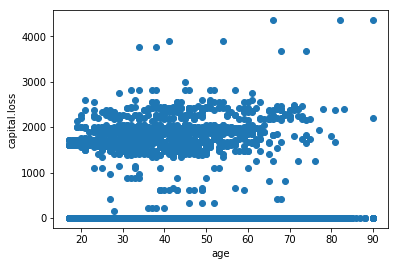

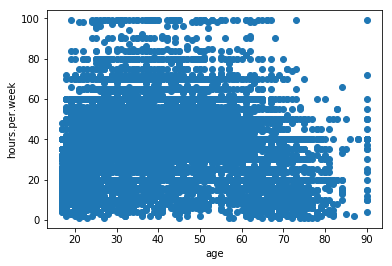

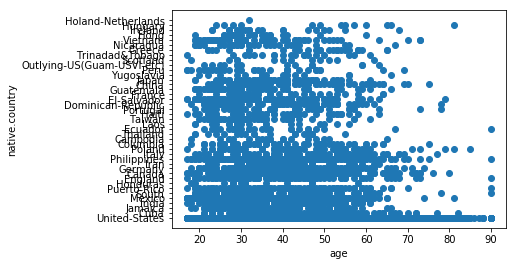

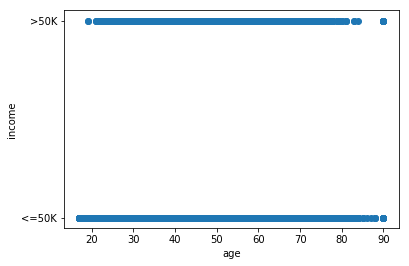

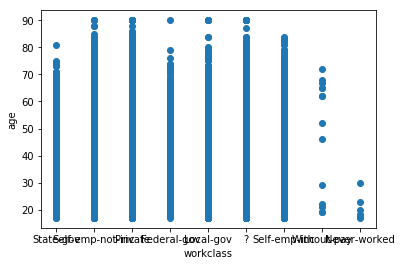

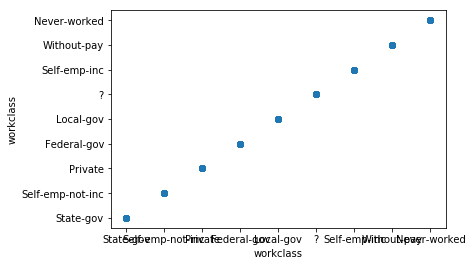

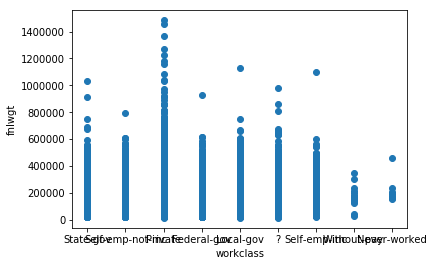

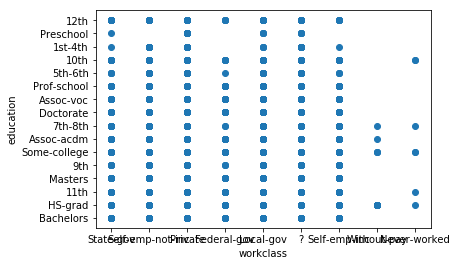

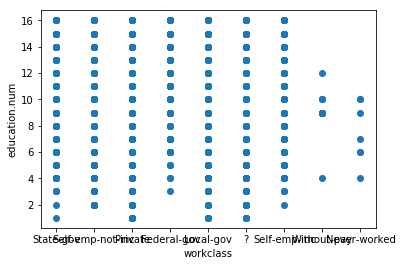

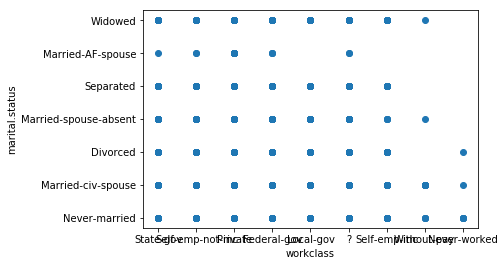

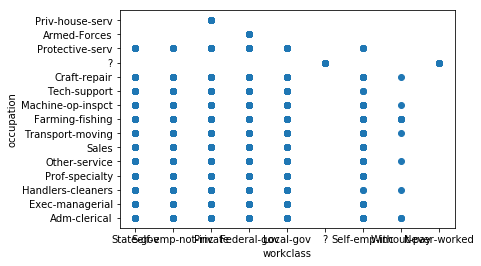

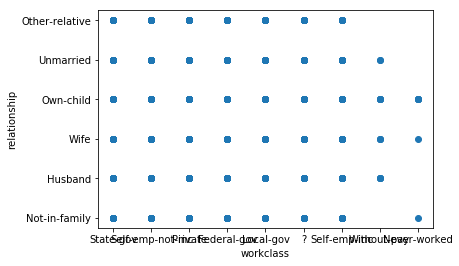

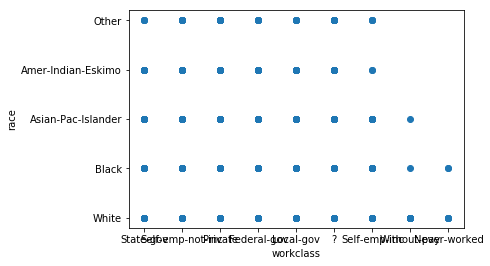

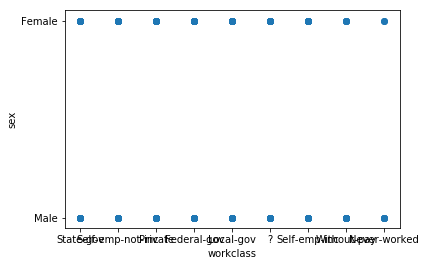

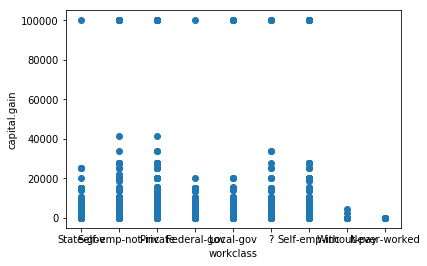

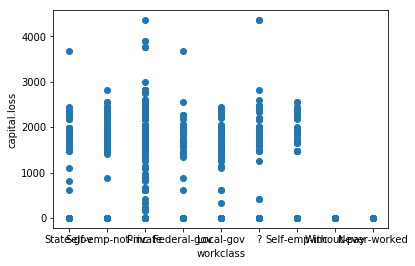

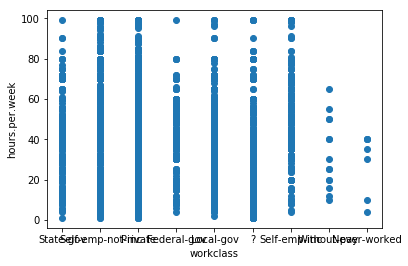

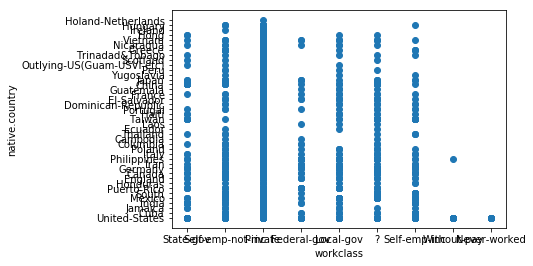

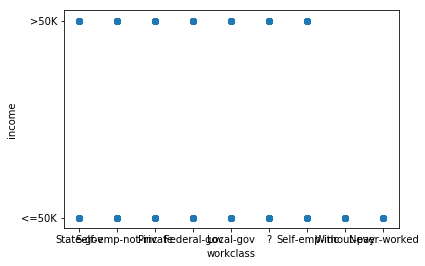

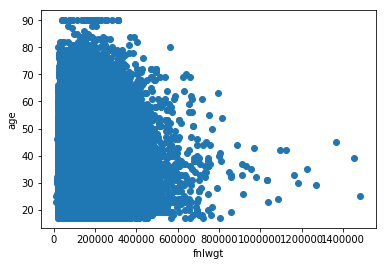

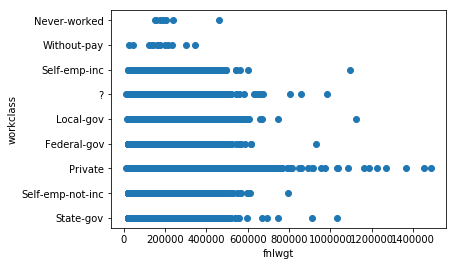

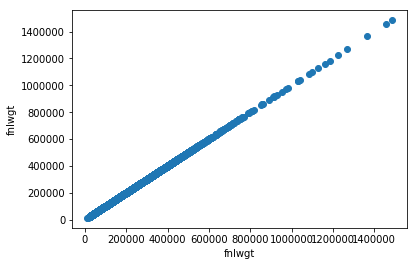

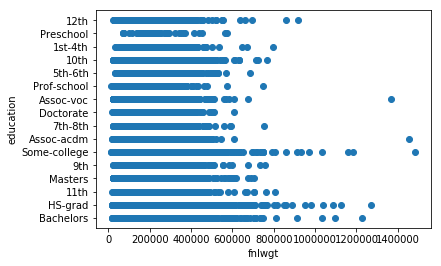

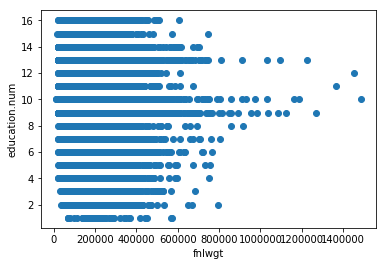

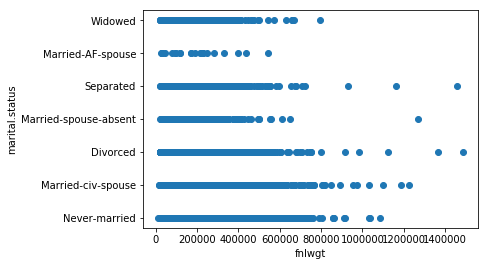

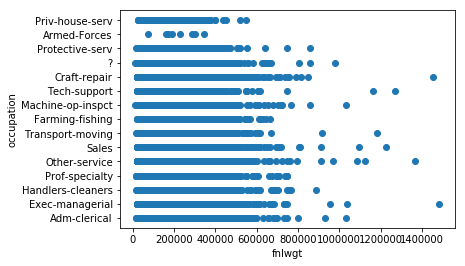

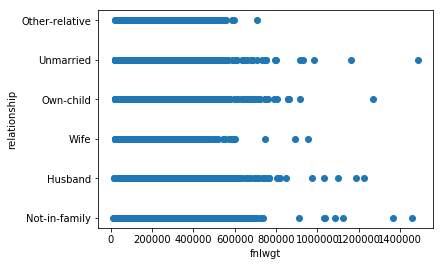

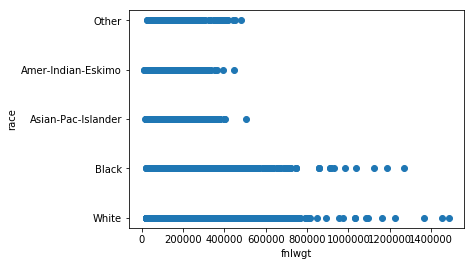

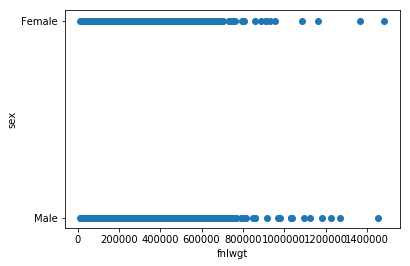

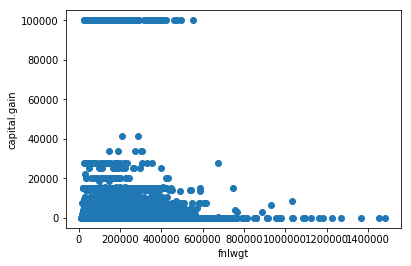

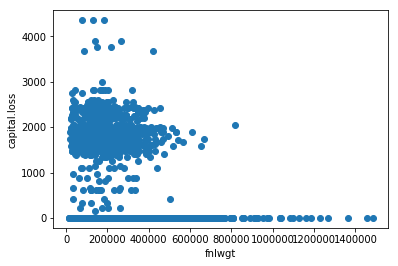

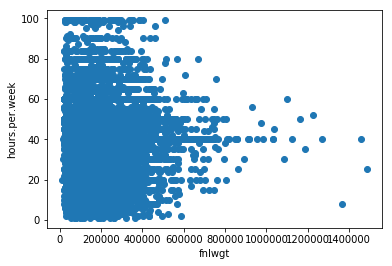

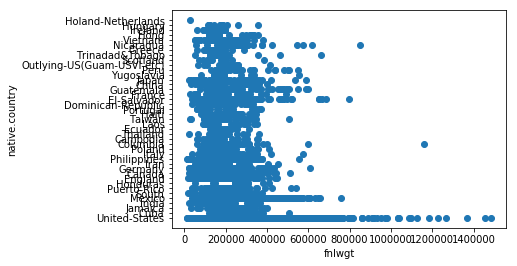

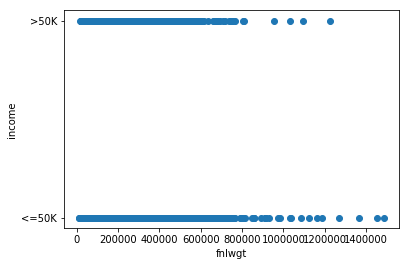

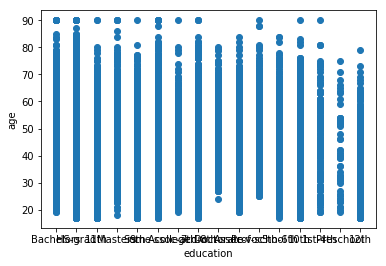

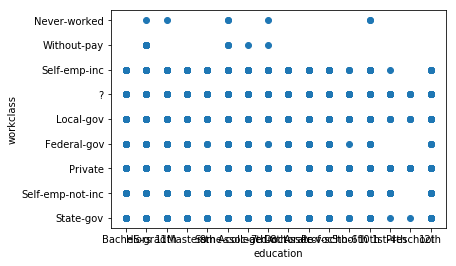

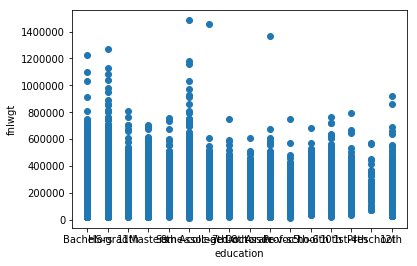

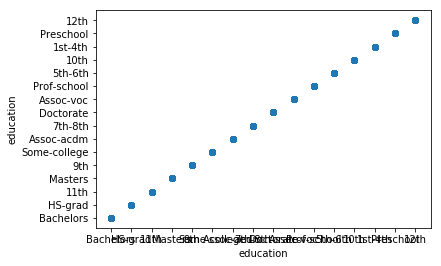

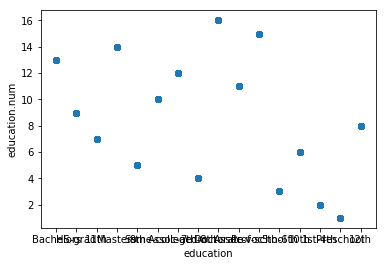

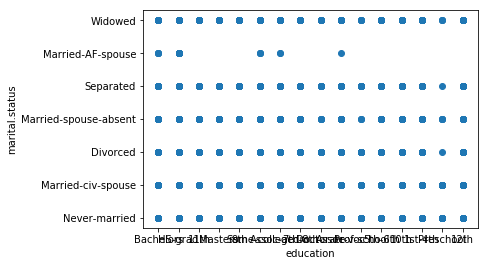

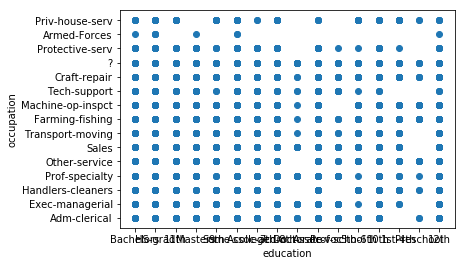

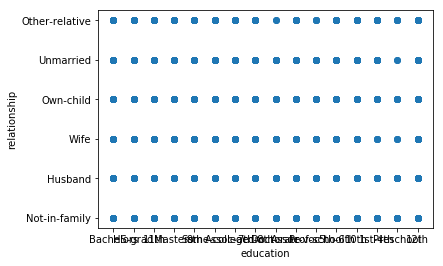

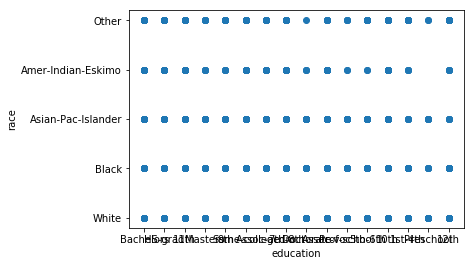

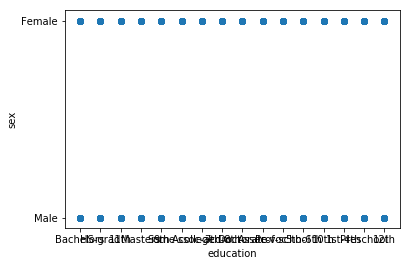

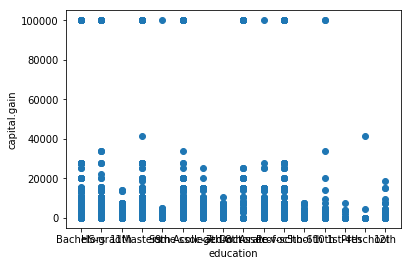

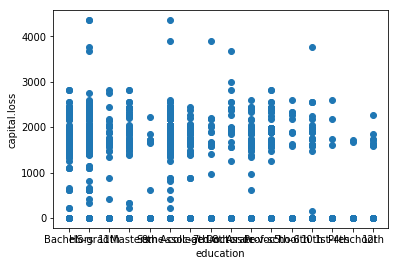

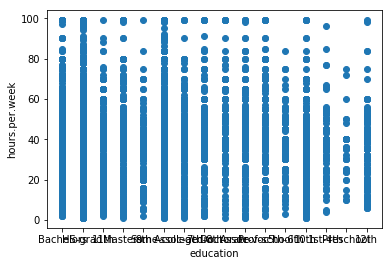

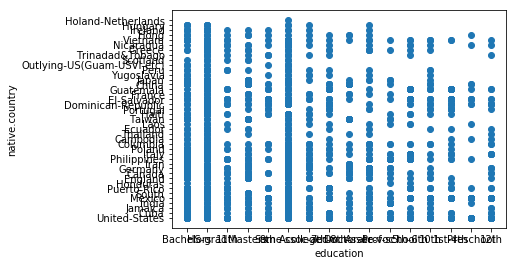

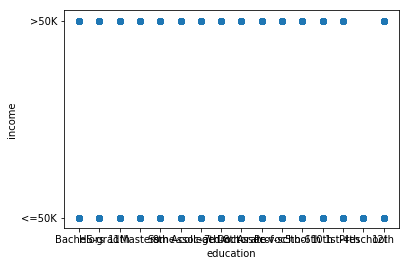

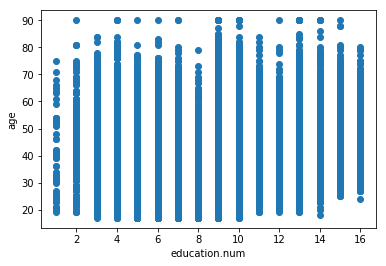

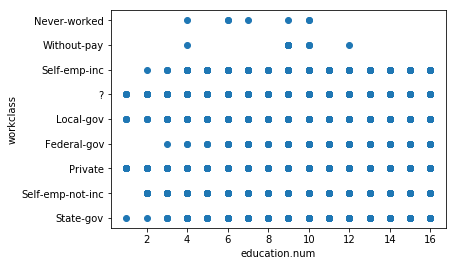

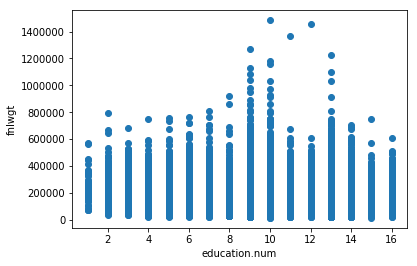

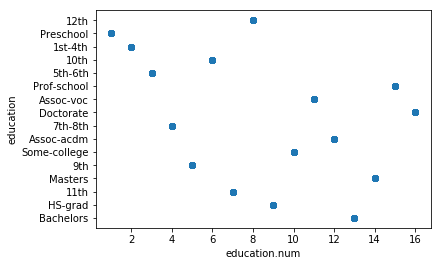

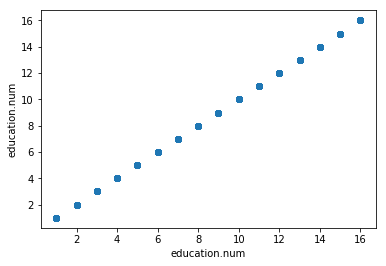

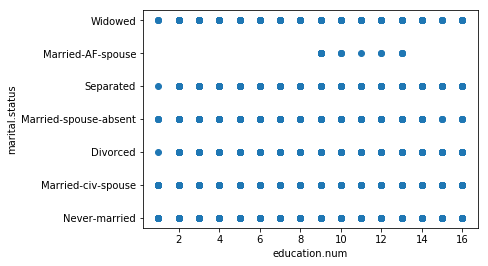

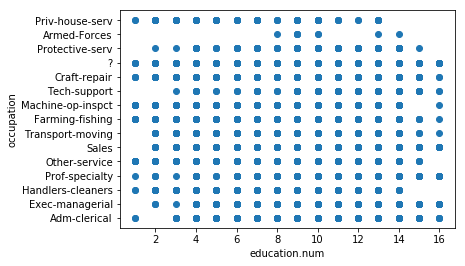

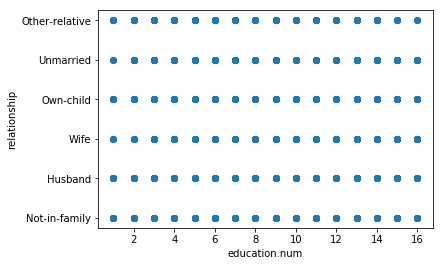

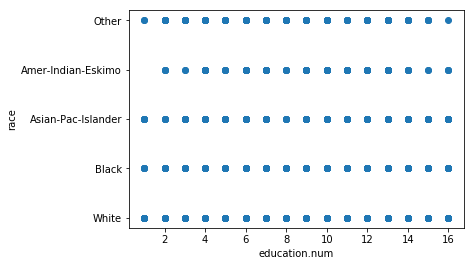

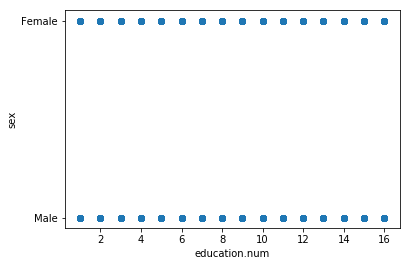

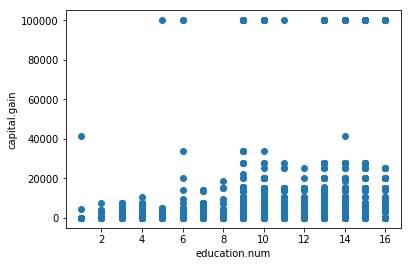

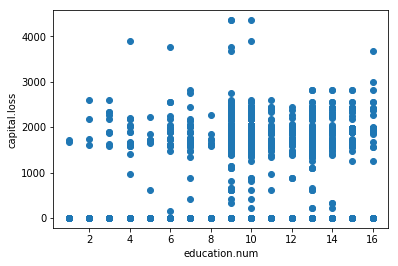

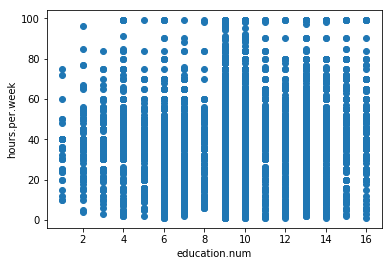

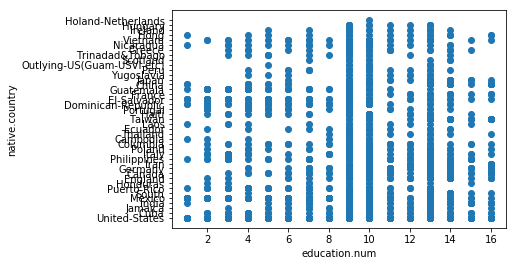

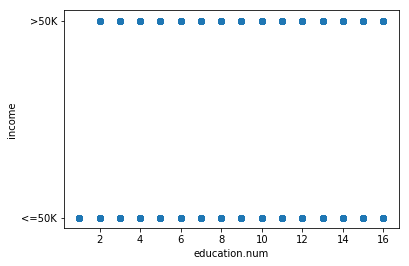

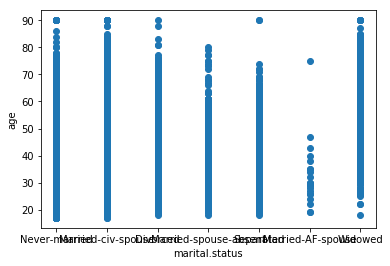

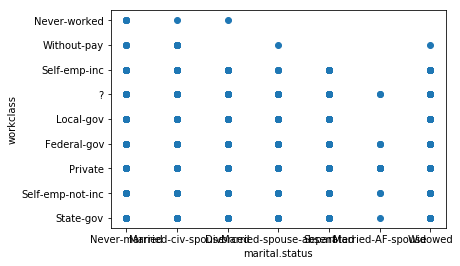

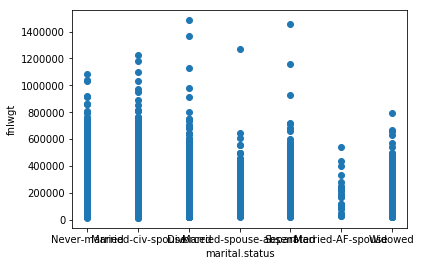

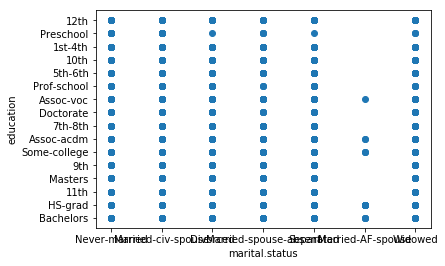

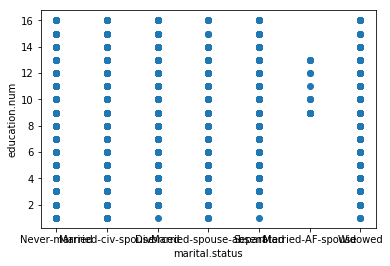

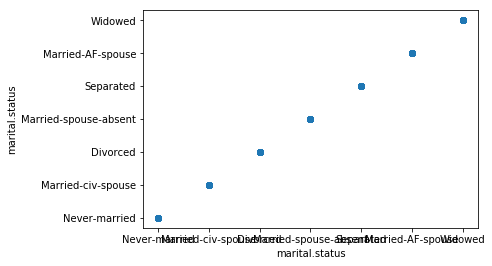

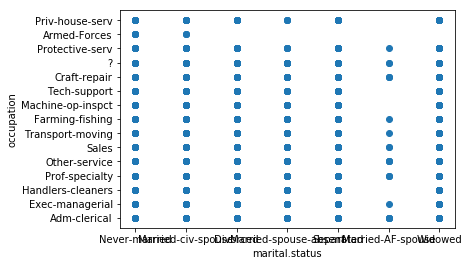

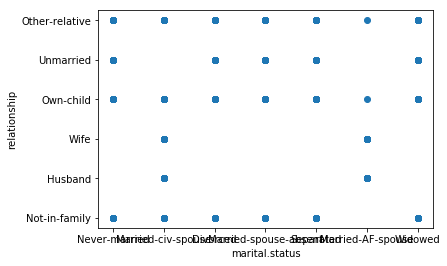

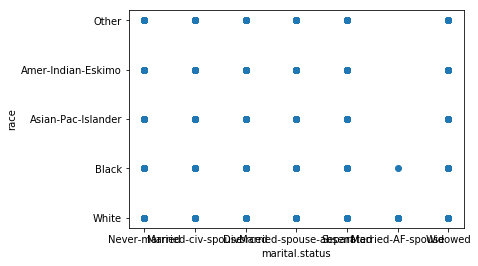

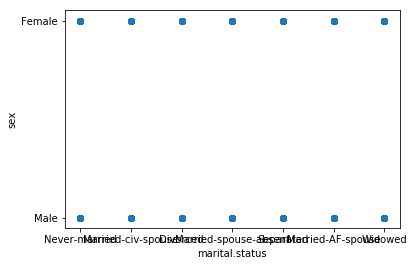

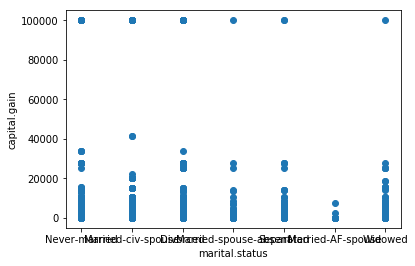

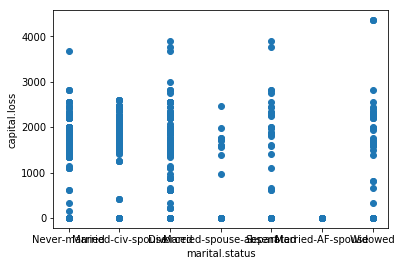

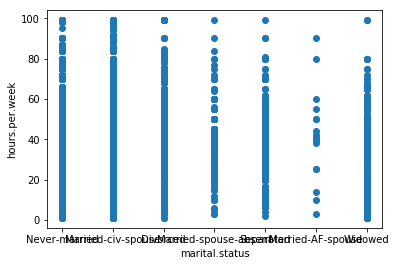

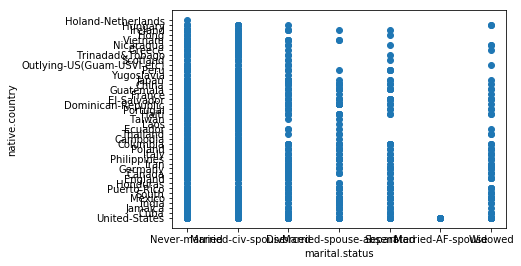

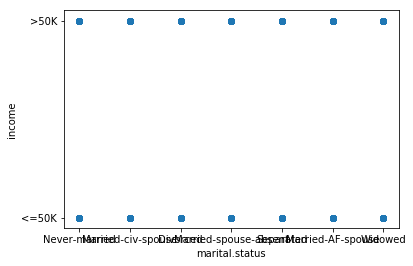

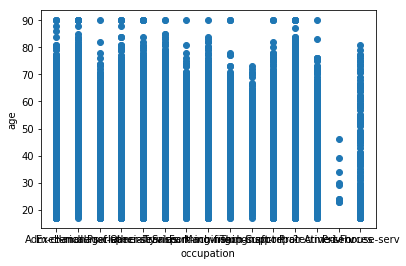

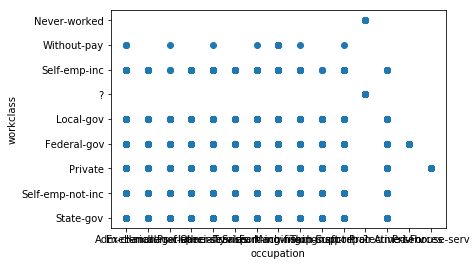

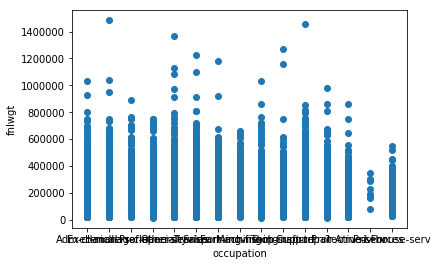

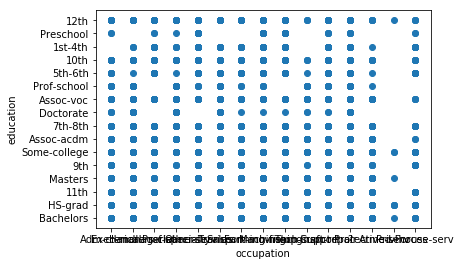

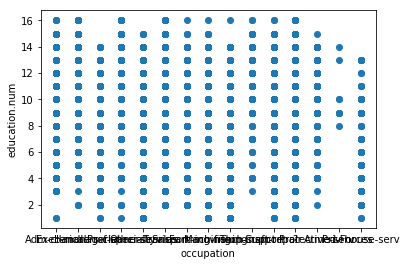

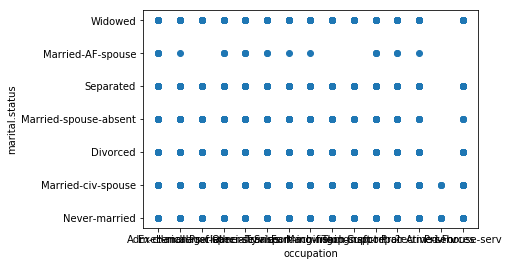

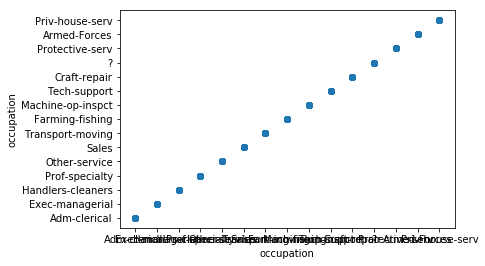

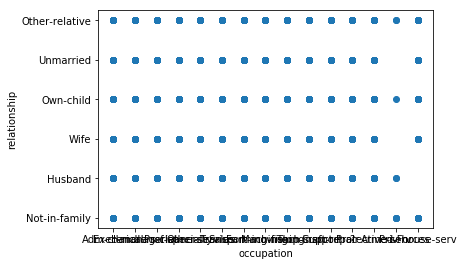

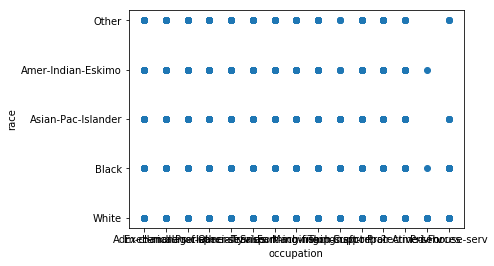

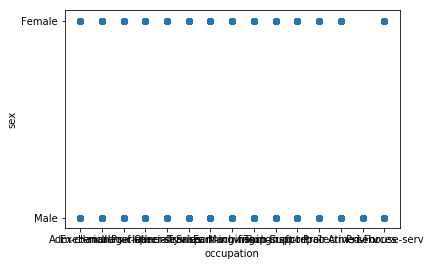

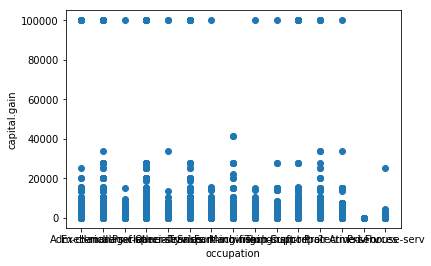

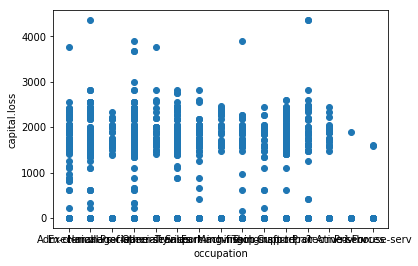

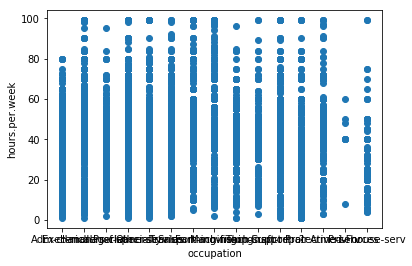

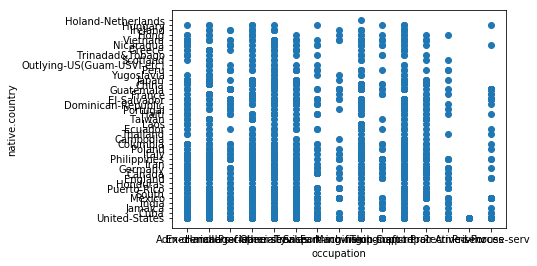

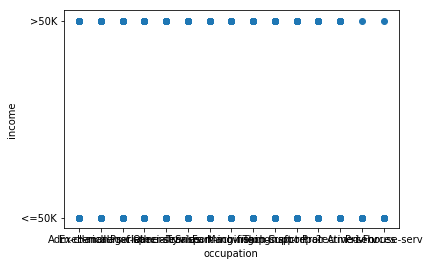

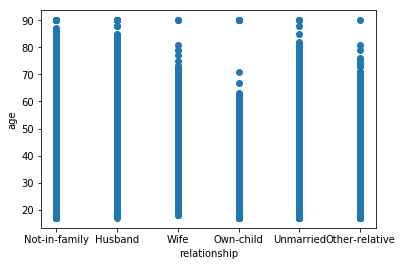

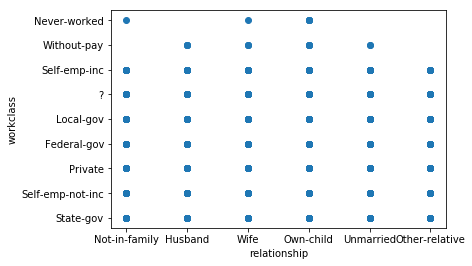

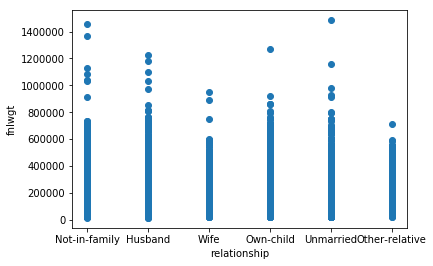

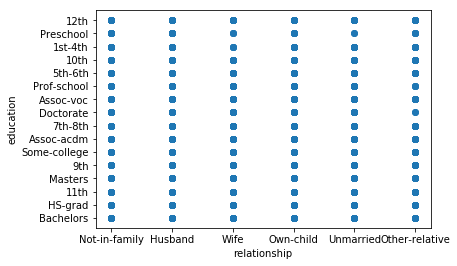

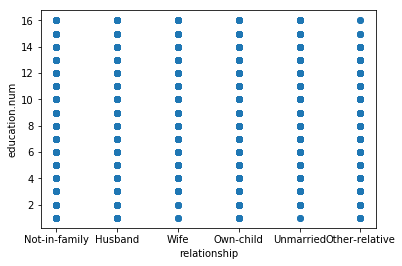

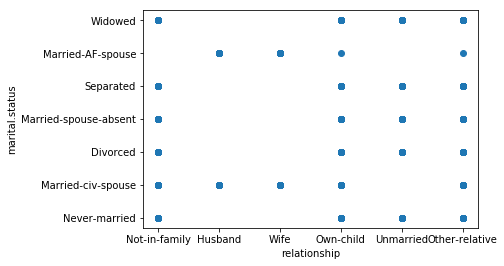

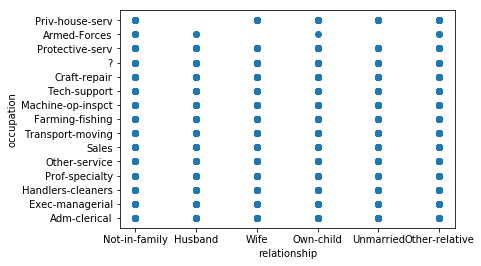

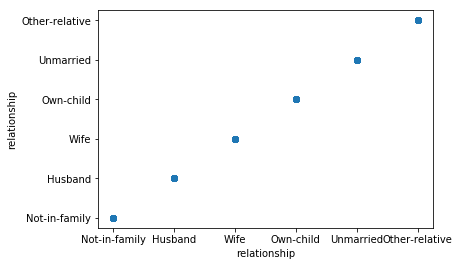

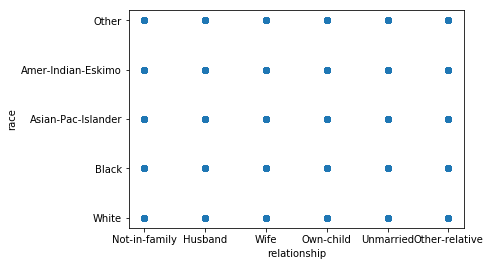

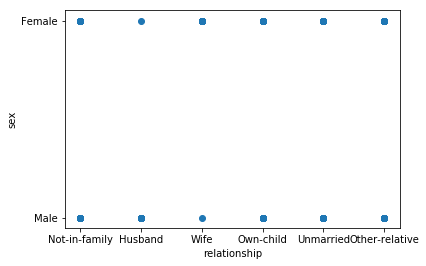

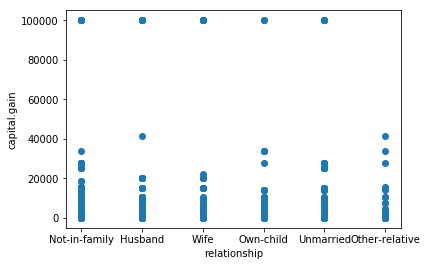

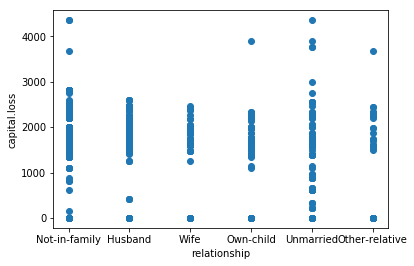

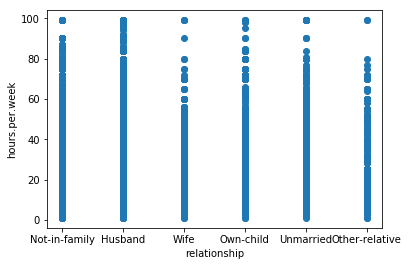

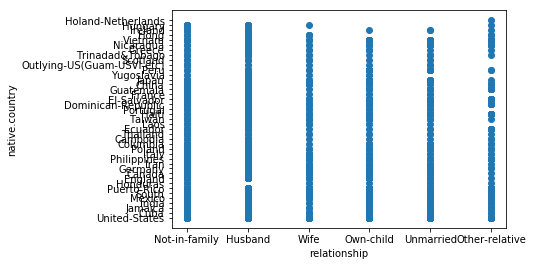

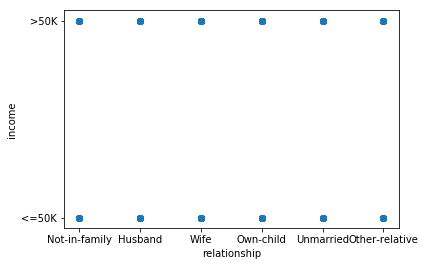

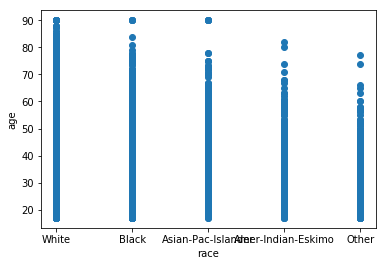

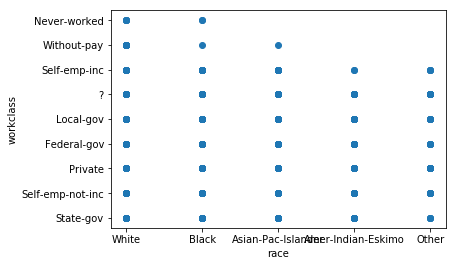

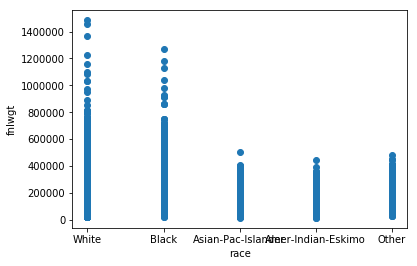

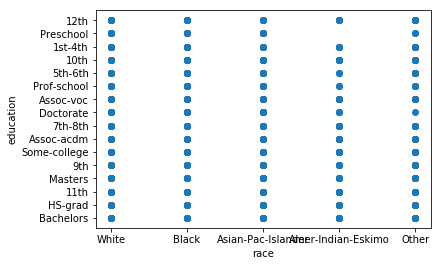

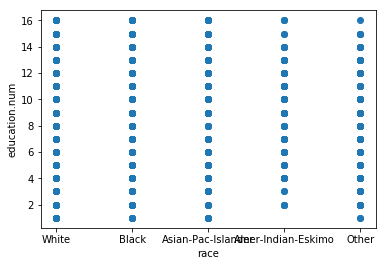

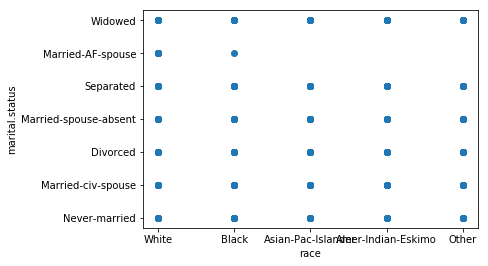

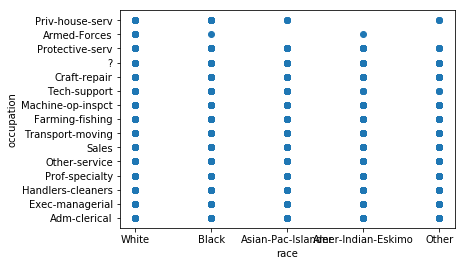

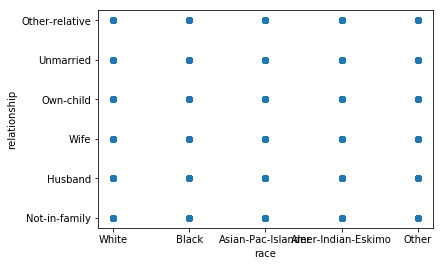

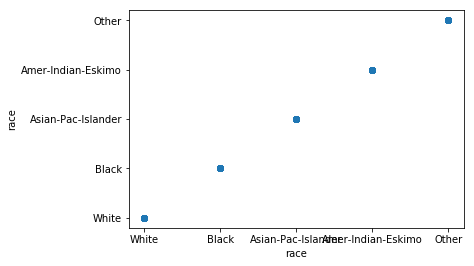

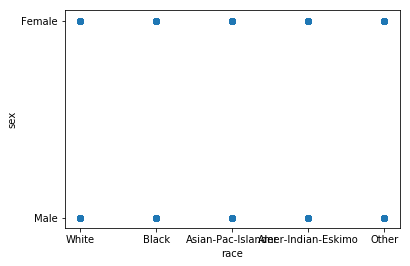

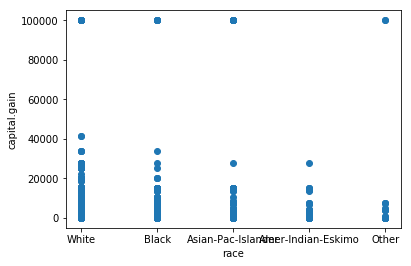

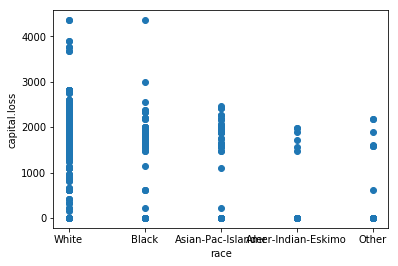

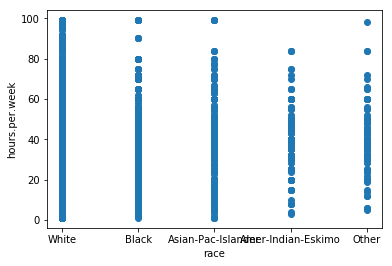

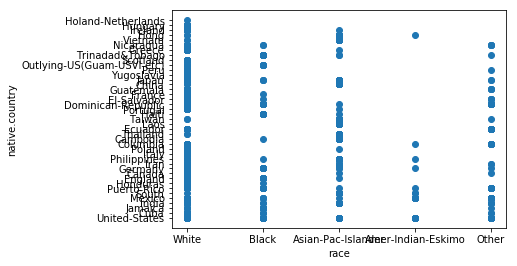

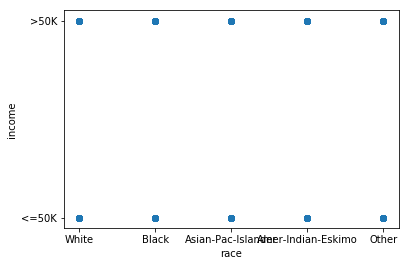

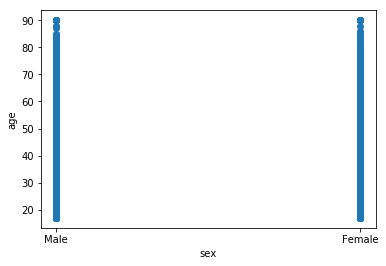

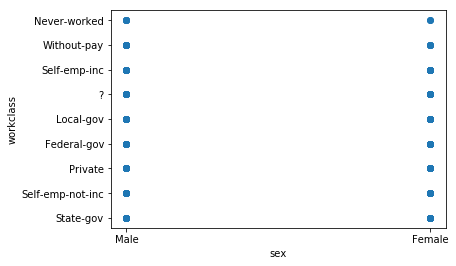

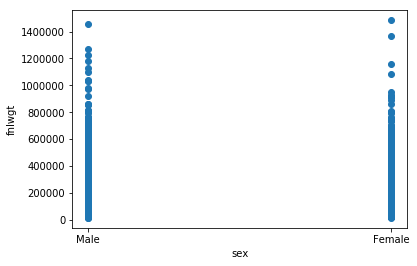

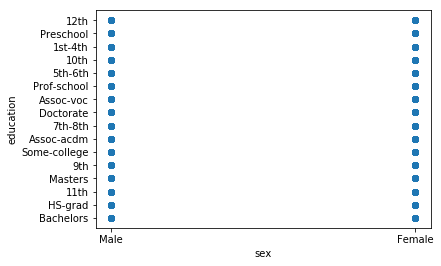

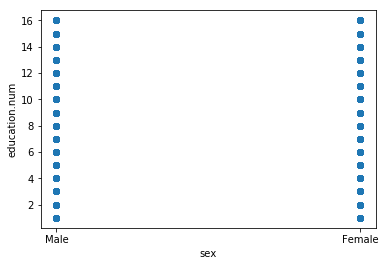

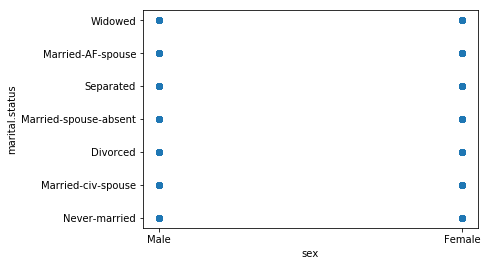

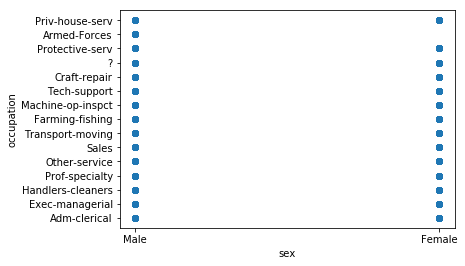

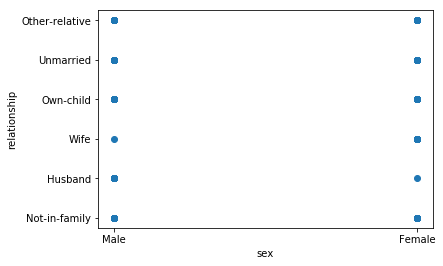

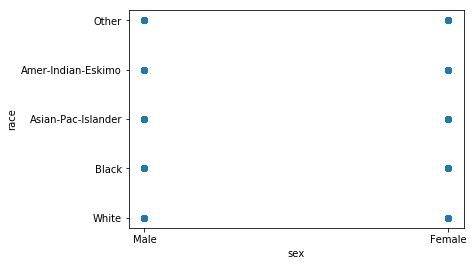

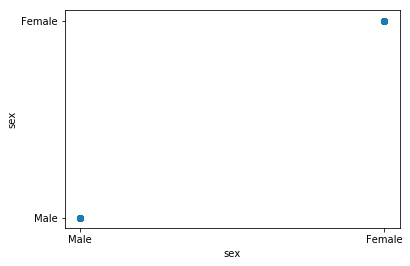

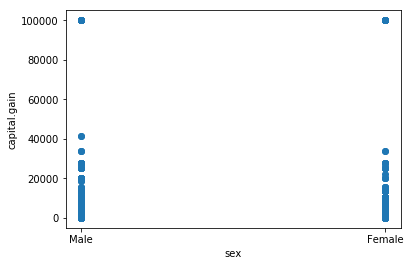

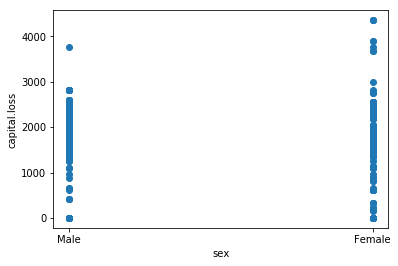

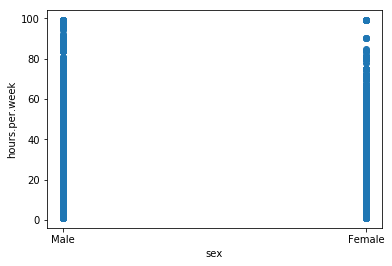

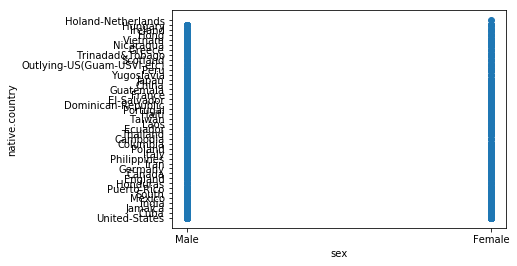

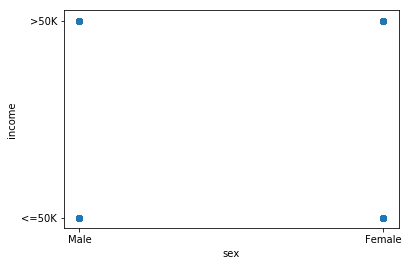

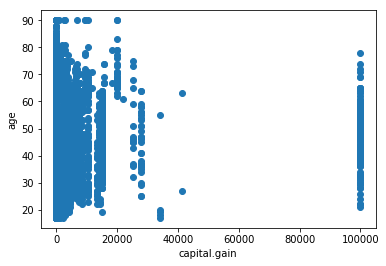

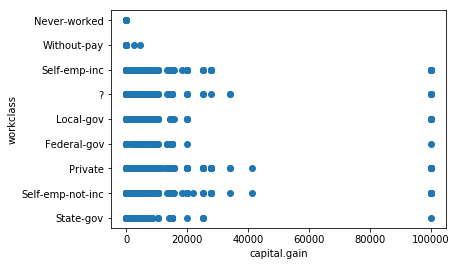

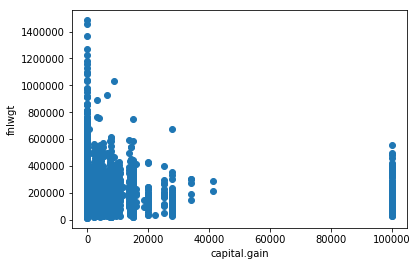

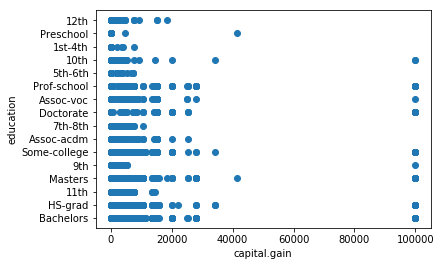

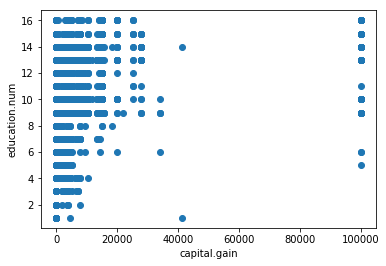

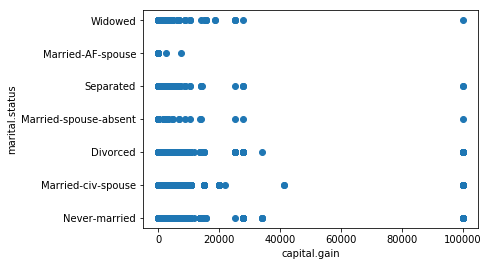

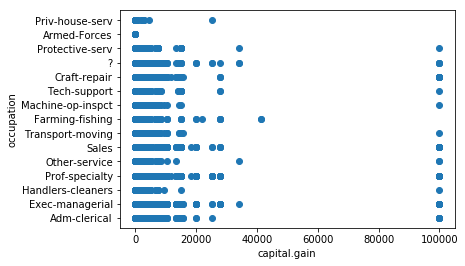

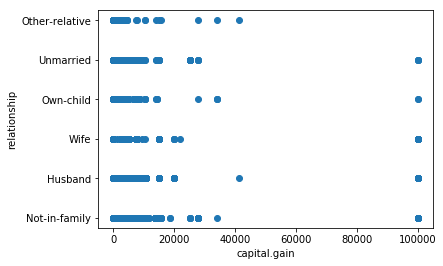

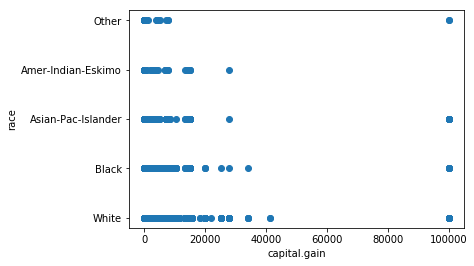

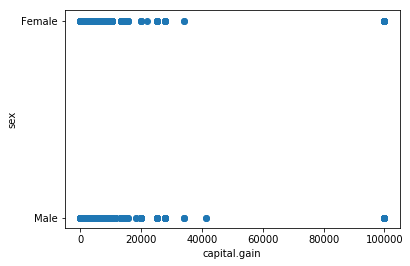

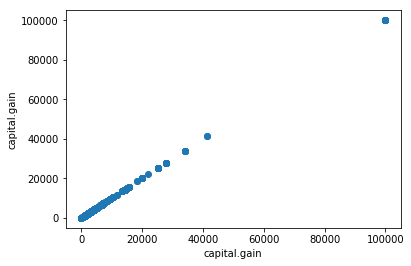

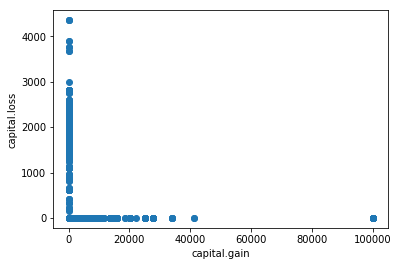

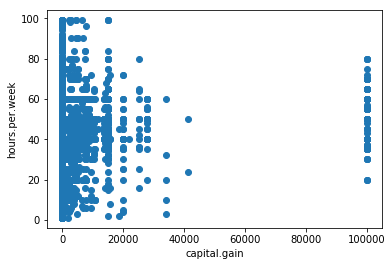

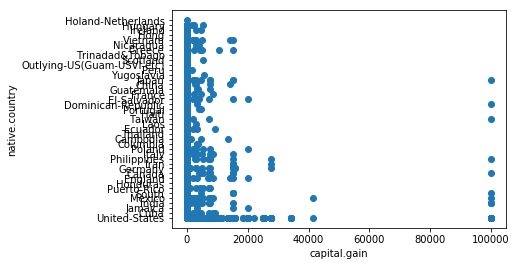

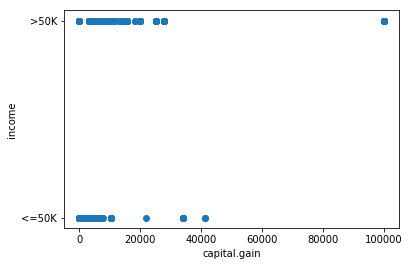

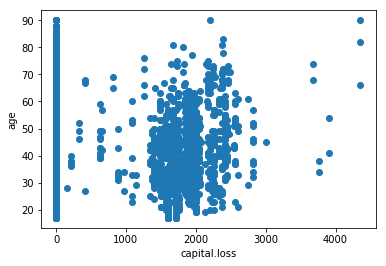

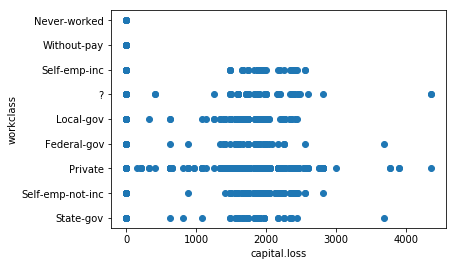

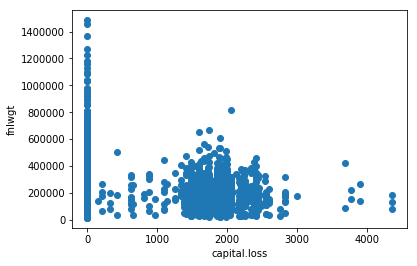

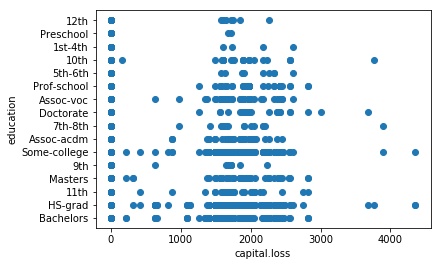

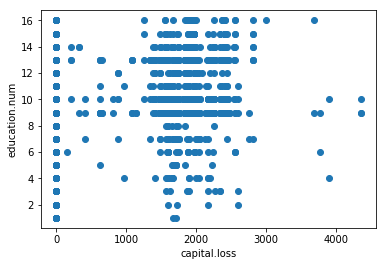

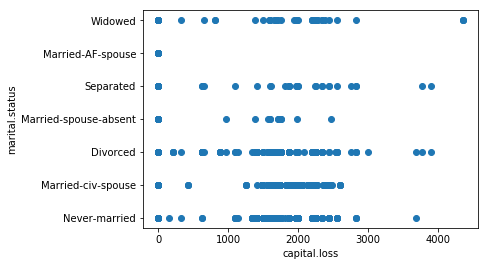

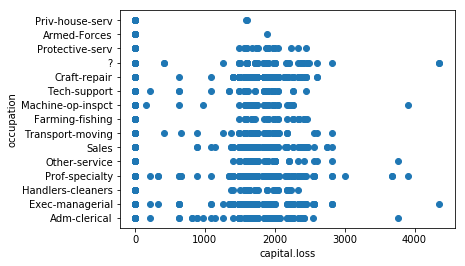

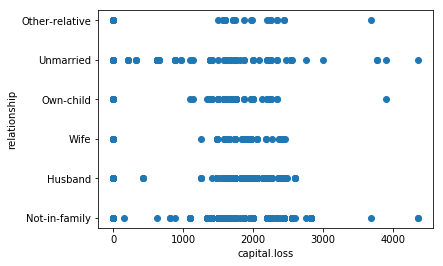

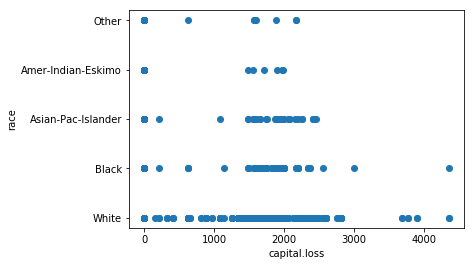

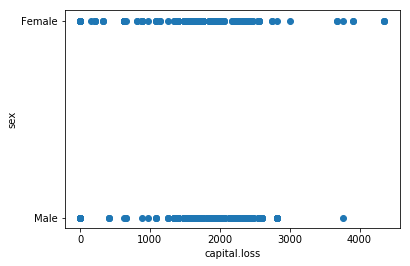

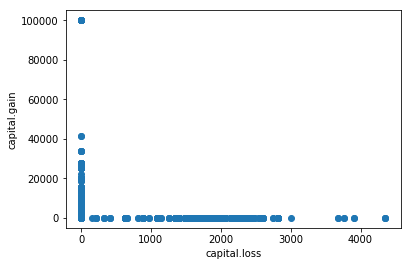

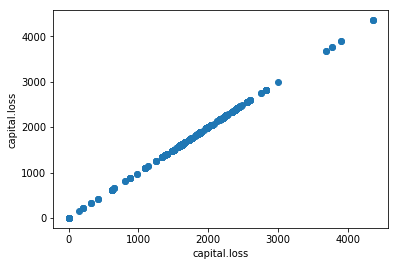

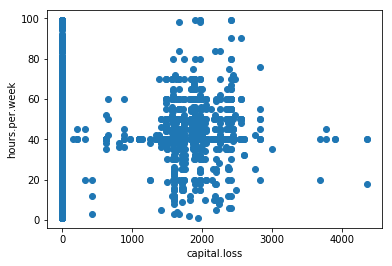

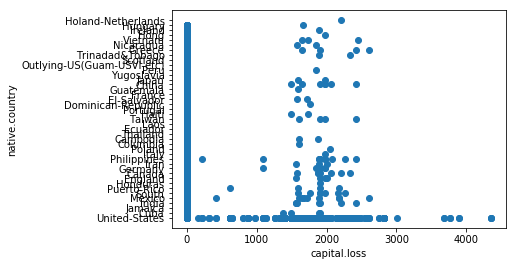

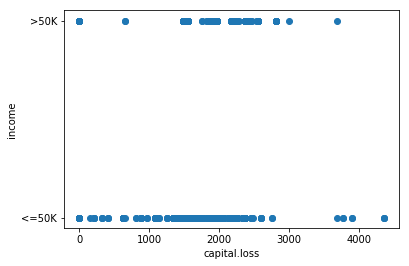

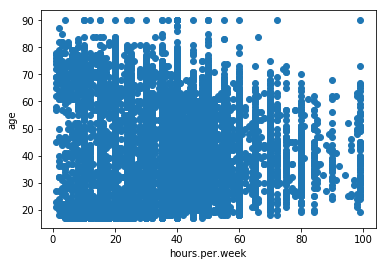

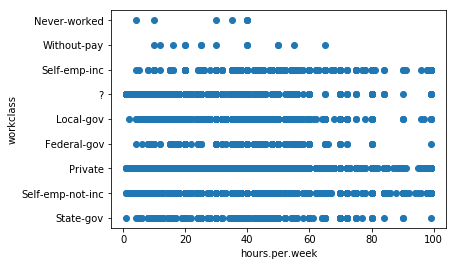

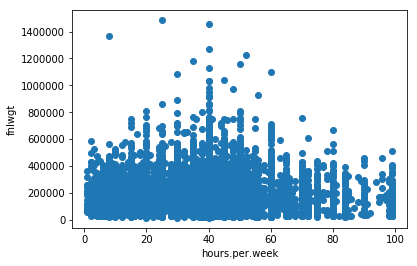

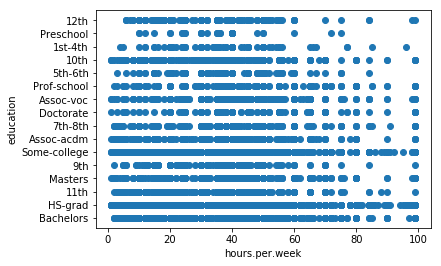

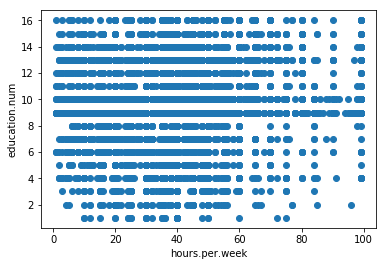

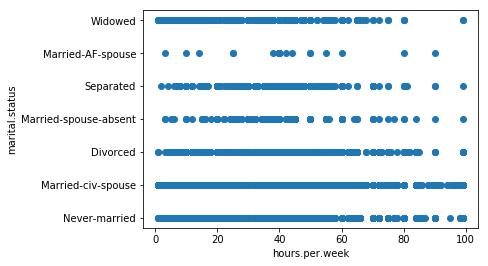

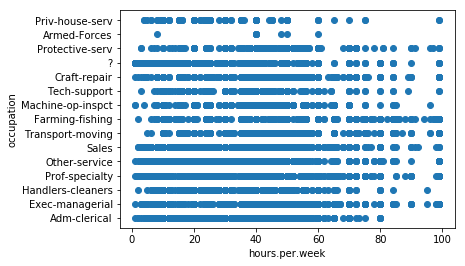

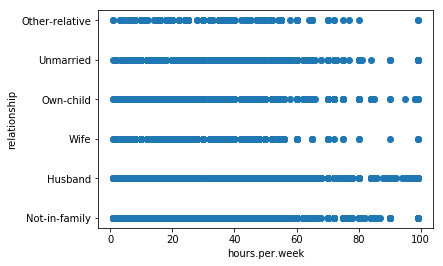

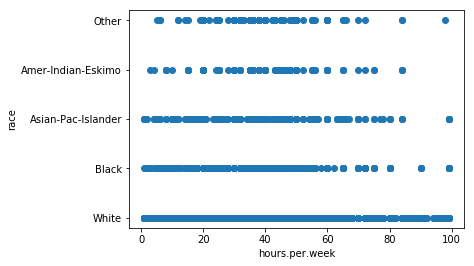

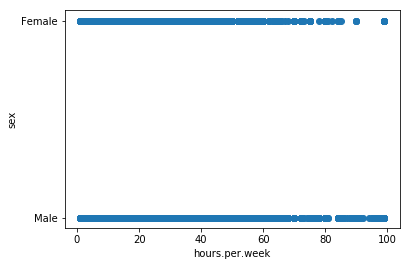

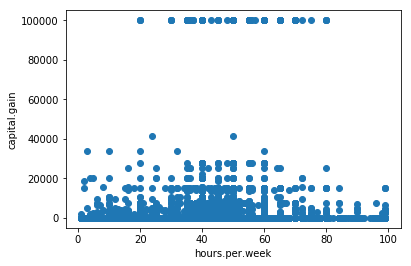

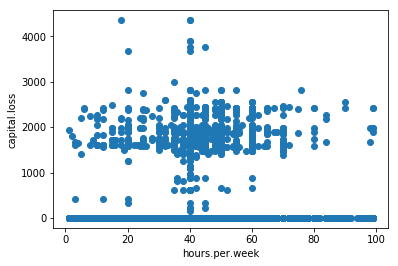

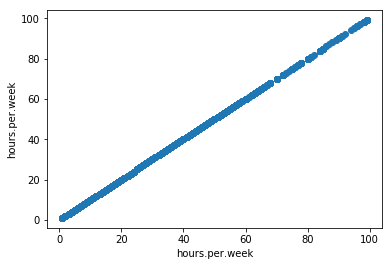

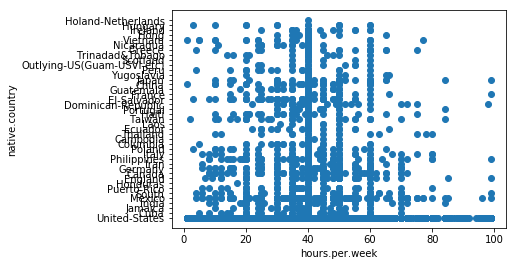

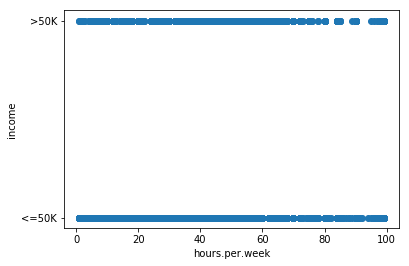

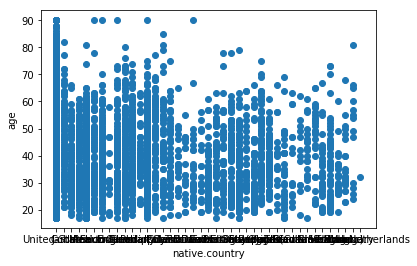

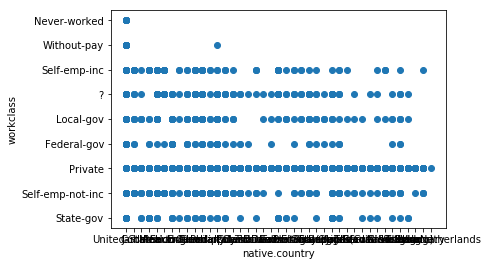

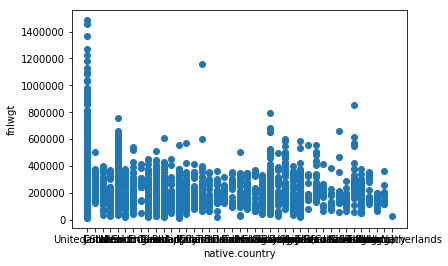

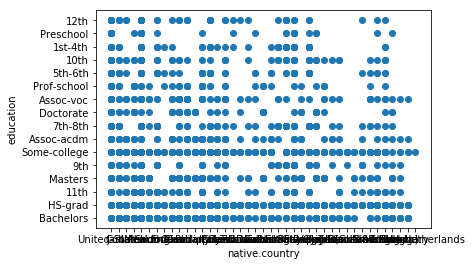

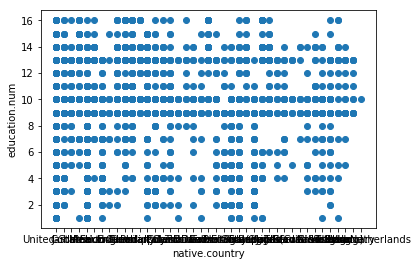

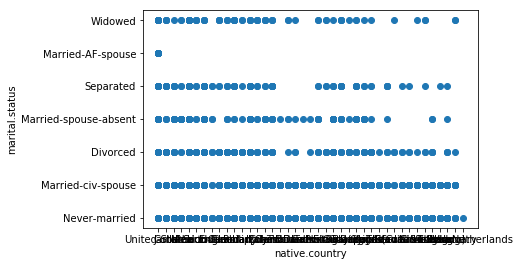

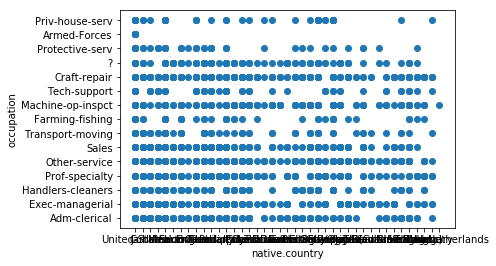

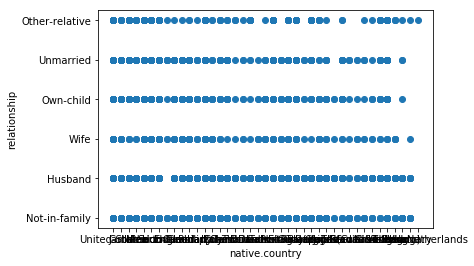

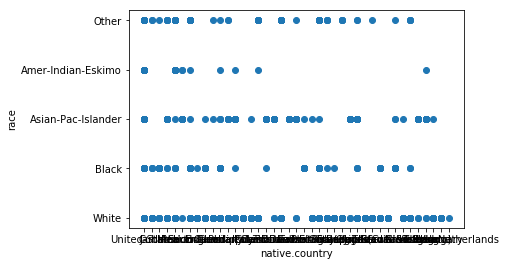

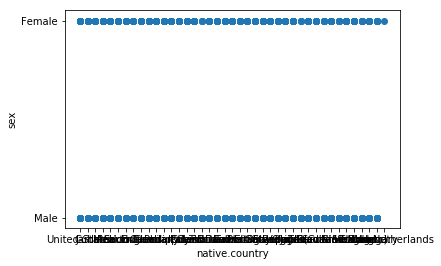

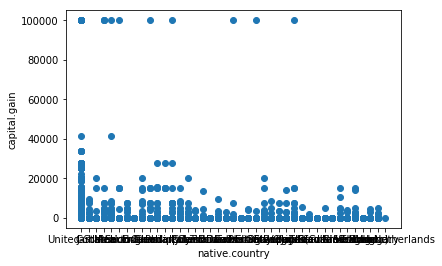

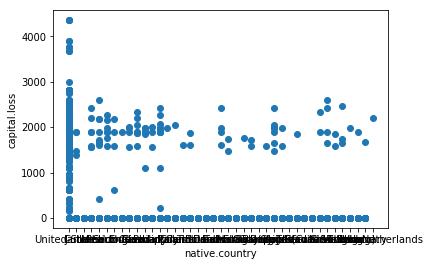

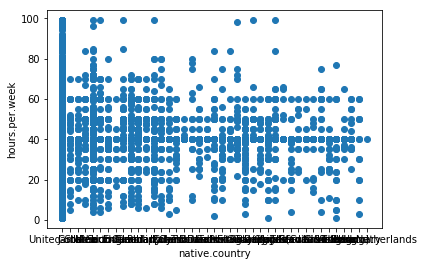

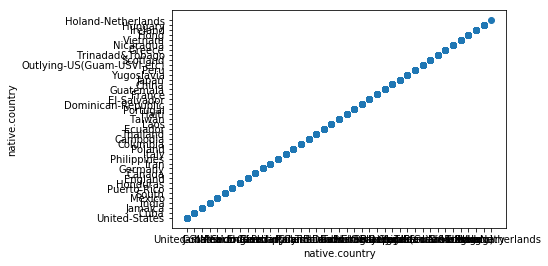

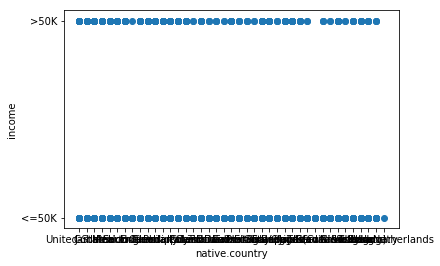

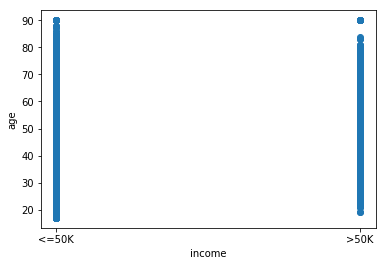

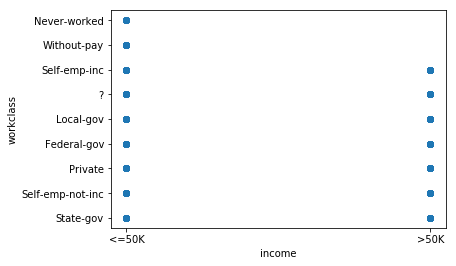

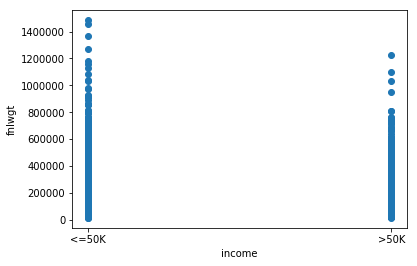

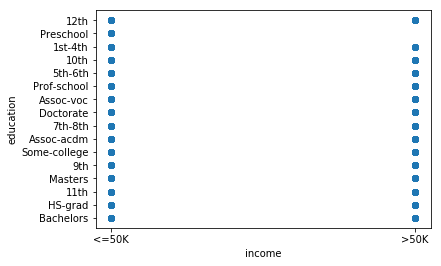

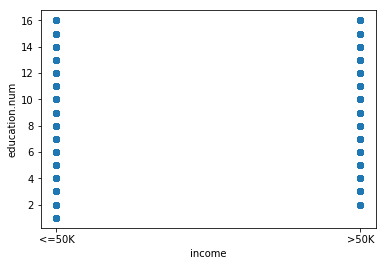

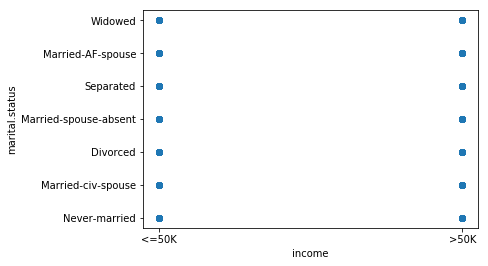

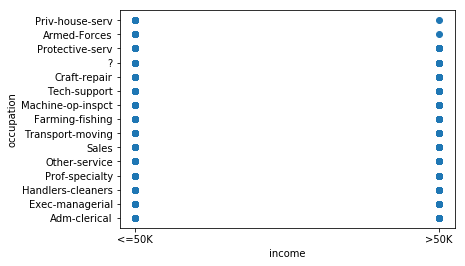

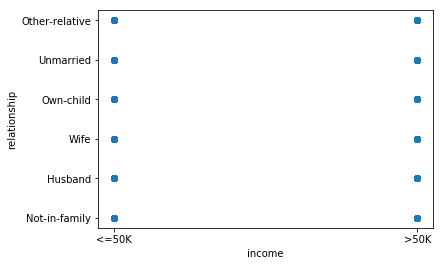

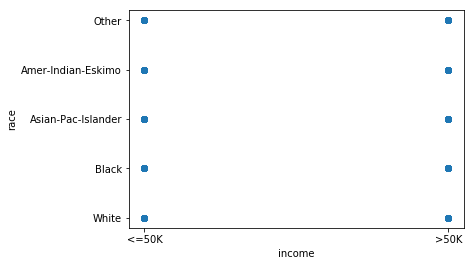

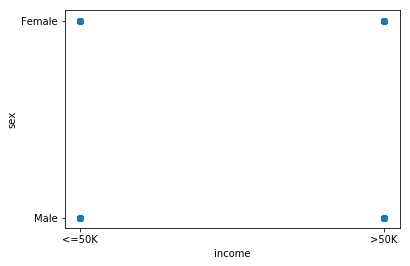

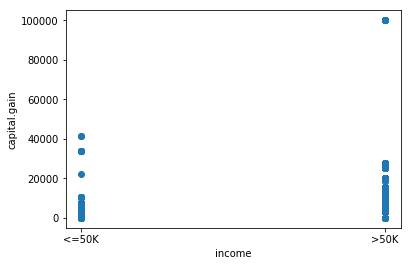

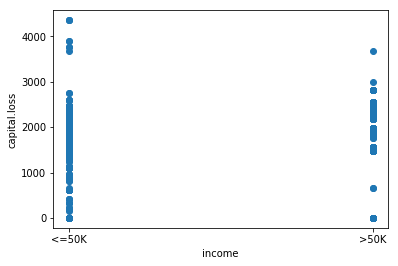

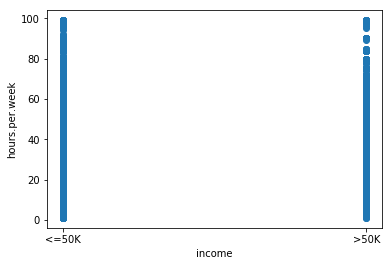

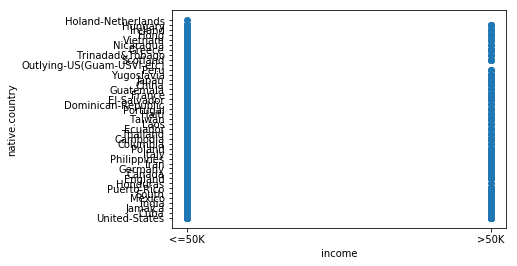

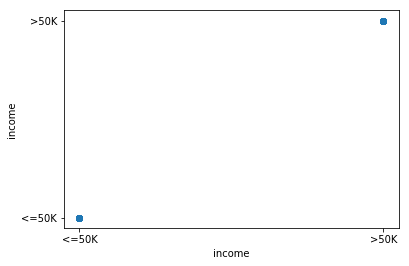

In [16]:
count=0
for i in df.columns:
    for j in df.columns:
        plt.figure(count)
        plt.scatter(df[i],df[j])
        plt.xlabel(i)
        plt.ylabel(j)
        count+=1

In [18]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

## Converting the following column data to numeric data using labelEncoder

In [19]:
l=['age','workclass','education','occupation','race','sex','capital.gain','capital.loss','hours.per.week','native.country','income','marital.status','relationship']

for i in l:
    df[i]=la.fit_transform(df[i])

In [20]:
df


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,22,7,77516,9,13,4,1,1,4,1,25,0,39,38,0
1,33,6,83311,9,13,2,4,0,4,1,0,0,12,38,0
2,21,4,215646,11,9,0,6,1,4,1,0,0,39,38,0
3,36,4,234721,1,7,2,6,0,2,1,0,0,39,38,0
4,11,4,338409,9,13,2,10,5,2,0,0,0,39,4,0
5,20,4,284582,12,14,2,4,5,4,0,0,0,39,38,0
6,32,4,160187,6,5,3,8,1,2,0,0,0,15,22,0
7,35,6,209642,11,9,2,4,0,4,1,0,0,44,38,1
8,14,4,45781,12,14,4,10,1,4,0,105,0,49,38,1
9,25,4,159449,9,13,2,4,0,4,1,79,0,39,38,1


## Model building and evaluation

In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

## Selecting columns to perform train_test_split

In [22]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1:].values


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)


In [24]:
lr.fit(x_train,y_train)

c:\users\viney gautam\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\viney gautam\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Checking predicted value to actual value

In [25]:
y_pred=lr.predict(x_test)
pd.DataFrame({'Actual':list(y_test),'Predicted':list(y_pred)})

,Actual,Predicted
0,[0],0
1,[1],1
2,[0],0
3,[0],0
4,[0],0
5,[0],0
6,[0],0
7,[0],0
8,[1],0
9,[0],0


## Checking accuracy and performance of the dataset

In [26]:
from sklearn.metrics import accuracy_score,f1_score
print("Accuracy : ",accuracy_score(y_test,y_pred)*100,"%")
print("F1_score : ",f1_score(y_test,y_pred))


Accuracy :  78.72107567229519 %
F1_score :  0.34028114396509934


# Conclusion :

Classification model based on the features for the prediction of income above $50k or not has been done with accuracy 78.72% .
